In [8]:
# Лабораторная работа №5
### Воложанин Владислав Олегович ИВТ 1.3 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import warnings

warnings.filterwarnings("ignore", message="'squared' is deprecated")

data = pd.read_csv('web_traffic.tsv', delimiter='\t', names=['hour', 'n_requests'])
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [2]:
filtered_data = data.dropna()
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 735 entries, 0 to 742
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   hour        735 non-null    int64  
 1   n_requests  735 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 17.2 KB


In [3]:
train_border_weeks = 3
final_border_weeks = 4.2

train_data_index = int(train_border_weeks * 7 * 24)
final_border_index = int(final_border_weeks * 7 * 24)
border_70_index = int(round(train_data_index + (final_border_index - train_data_index) * 0.7))

hours_data_train = filtered_data['hour'][train_data_index:border_70_index]
requests_data_train = filtered_data['n_requests'][train_data_index:border_70_index]
hours_data_test = filtered_data['hour'][border_70_index:final_border_index]
requests_data_test = filtered_data['n_requests'][border_70_index:final_border_index]

print(hours_data_train[:5], requests_data_train[:5])
print(hours_data_test[:5], requests_data_test[:5])

512    513
513    514
514    515
515    516
516    517
Name: hour, dtype: int64 512    1389.0
513    2251.0
514    2167.0
515    2028.0
516    1590.0
Name: n_requests, dtype: float64
-------------------
653    654
654    655
655    656
656    657
657    658
Name: hour, dtype: int64 653    2818.0
654    2683.0
655    2628.0
656    2994.0
657    2303.0
Name: n_requests, dtype: float64


In [4]:
polynomial_degrees = [1, 2, 3]
models = {}
for degree in polynomial_degrees:
    coeffs, residuals, rank, sv, rcond = np.polyfit(hours_data_train, requests_data_train, degree, full=True)
    models[degree] = np.poly1d(coeffs)
    print(f"Параметры модели ({degree}-степень) {coeffs}")

Параметры модели (1-степень) [  3.08811593 380.45110807]
Параметры модели (2-степень) [ 3.57859048e-02 -3.86382491e+01  1.24844012e+04]
Параметры модели (3-степень) [ 1.27341104e-03 -2.19141001e+00  1.25601991e+03 -2.37635045e+05]


In [5]:
for degree, model in models.items():
    predictions_train = model(hours_data_train)
    r2 = r2_score(requests_data_train, predictions_train)
    rmse = mean_squared_error(requests_data_train, predictions_train, squared=False)
    mse = mean_squared_error(requests_data_train, predictions_train, squared=True)
    mae = mean_absolute_error(requests_data_train, predictions_train)
    print(f'Степень полинома {degree}: r2 = {r2}, mse = {mse}, rmse = {rmse}, mae = {mae}')

Степень полинома 1: r2 = 0.10791888183969967, mse = 130595.80763969159, rmse = 361.3804195576894, mae = 282.637737657776
Степень полинома 2: r2 = 0.12712297613648615, mse = 127784.43303078863, rmse = 357.4694854540575, mae = 277.67396143866614
Степень полинома 3: r2 = 0.15818738547037037, mse = 123236.77302182563, rmse = 351.05095502195354, mae = 269.1345313051528


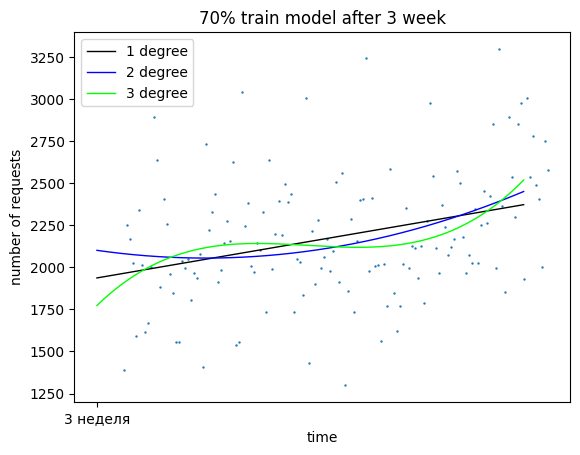

In [6]:
plt.scatter(hours_data_train, requests_data_train, s=0.5)
plt.xlabel('time')
plt.ylabel('number of requests')
plt.xticks([w * 7 * 24 for w in range(6)], [f"{w} неделя" for w in range(6)])

f2x = np.linspace(train_data_index, border_70_index, len(hours_data_train))

colors = ['black', 'blue', 'lime']
for degree, color in zip(polynomial_degrees, colors):
    f2y = models[degree](f2x)
    plt.plot(f2x, f2y, linewidth=1.0, color=color, label=f'{degree} degree')

plt.autoscale(tight=False)
plt.legend()
plt.show()

In [7]:
border = train_data_index + 5
while border < final_border_index:
    hours_data_train = filtered_data['hour'][train_data_index:border]
    requests_data_train = filtered_data['n_requests'][train_data_index:border]

    percentage_train = round(100 * (border - train_data_index) / (final_border_index - train_data_index), 1)
    percentage_test = round(100 - percentage_train, 1)

    for degree in polynomial_degrees:
        model = np.poly1d(np.polyfit(hours_data_train, requests_data_train, degree))
        predictions_train = model(hours_data_train)
        rmse = mean_squared_error(requests_data_train, predictions_train, squared=False)
        mse = mean_squared_error(requests_data_train, predictions_train, squared=True)
        mae = mean_absolute_error(requests_data_train, predictions_train)

        print(f'Percentage: train = {percentage_train}%, test = {percentage_test}%')
        print(f'Polynomial degree {degree}: mse = {round(mse, 2)}, rmse = {round(rmse, 2)}, mae = {round(mae, 2)}')

    border += 5

Percentage: train = 2.5%, test = 97.5%
Polynomial degree 1: mse = 112753.18, rmse = 335.79, mae = 316.4
-----------------------
Percentage: train = 2.5%, test = 97.5%
Polynomial degree 2: mse = 12052.82, rmse = 109.79, mae = 97.1
-----------------------
Percentage: train = 2.5%, test = 97.5%
Polynomial degree 3: mse = 3680.64, rmse = 60.67, mae = 51.89
-----------------------
Percentage: train = 5.0%, test = 95.0%
Polynomial degree 1: mse = 91790.68, rmse = 302.97, mae = 271.42
-----------------------
Percentage: train = 5.0%, test = 95.0%
Polynomial degree 2: mse = 82778.86, rmse = 287.71, mae = 255.75
-----------------------
Percentage: train = 5.0%, test = 95.0%
Polynomial degree 3: mse = 59548.37, rmse = 244.03, mae = 198.24
-----------------------
Percentage: train = 7.5%, test = 92.5%
Polynomial degree 1: mse = 129667.61, rmse = 360.09, mae = 313.11
-----------------------
Percentage: train = 7.5%, test = 92.5%
Polynomial degree 2: mse = 129583.53, rmse = 359.98, mae = 312.28
---